In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> Bike Sharing Assignment </font>

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


##  Task 1: Reading and Understanding the data

- ### Subtask 1.1: Read the Data.

In [3]:
# Read the csv file using 'read_csv'.
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions and info of the different numeric columns.

In [4]:
# Check the number of rows and columns in the dataframe
df.shape

(730, 16)

In [5]:
# Check the column-wise info of the dataframe
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [6]:
# Brief the statistics of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- ### Subtask 1.3: Drop the unnecessary Variables.

In [7]:
# Dropping the innecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1,inplace = True) 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##  Task 2: Data Visualization

Now that we have loaded the dataset,dropped the unnecessary columns and inspected it, we see that most of the data is in place. Now we will perform some Exploratory Data Analysis and check the correlation of variable and treat them.

- ### Subtask 1.1: Check the values of the columns

In [8]:
# Rounding off the columns upto two decimals
df.iloc[:,7:11] = (df.iloc[:,7:11]).round(2)
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,2,1,2,14.90,17.69,69.61,16.65,801


In [9]:
# Check the null values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [10]:
# Check the data types of the columns
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

- ### Subtask 1.2: Exploratory Data Analysis

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

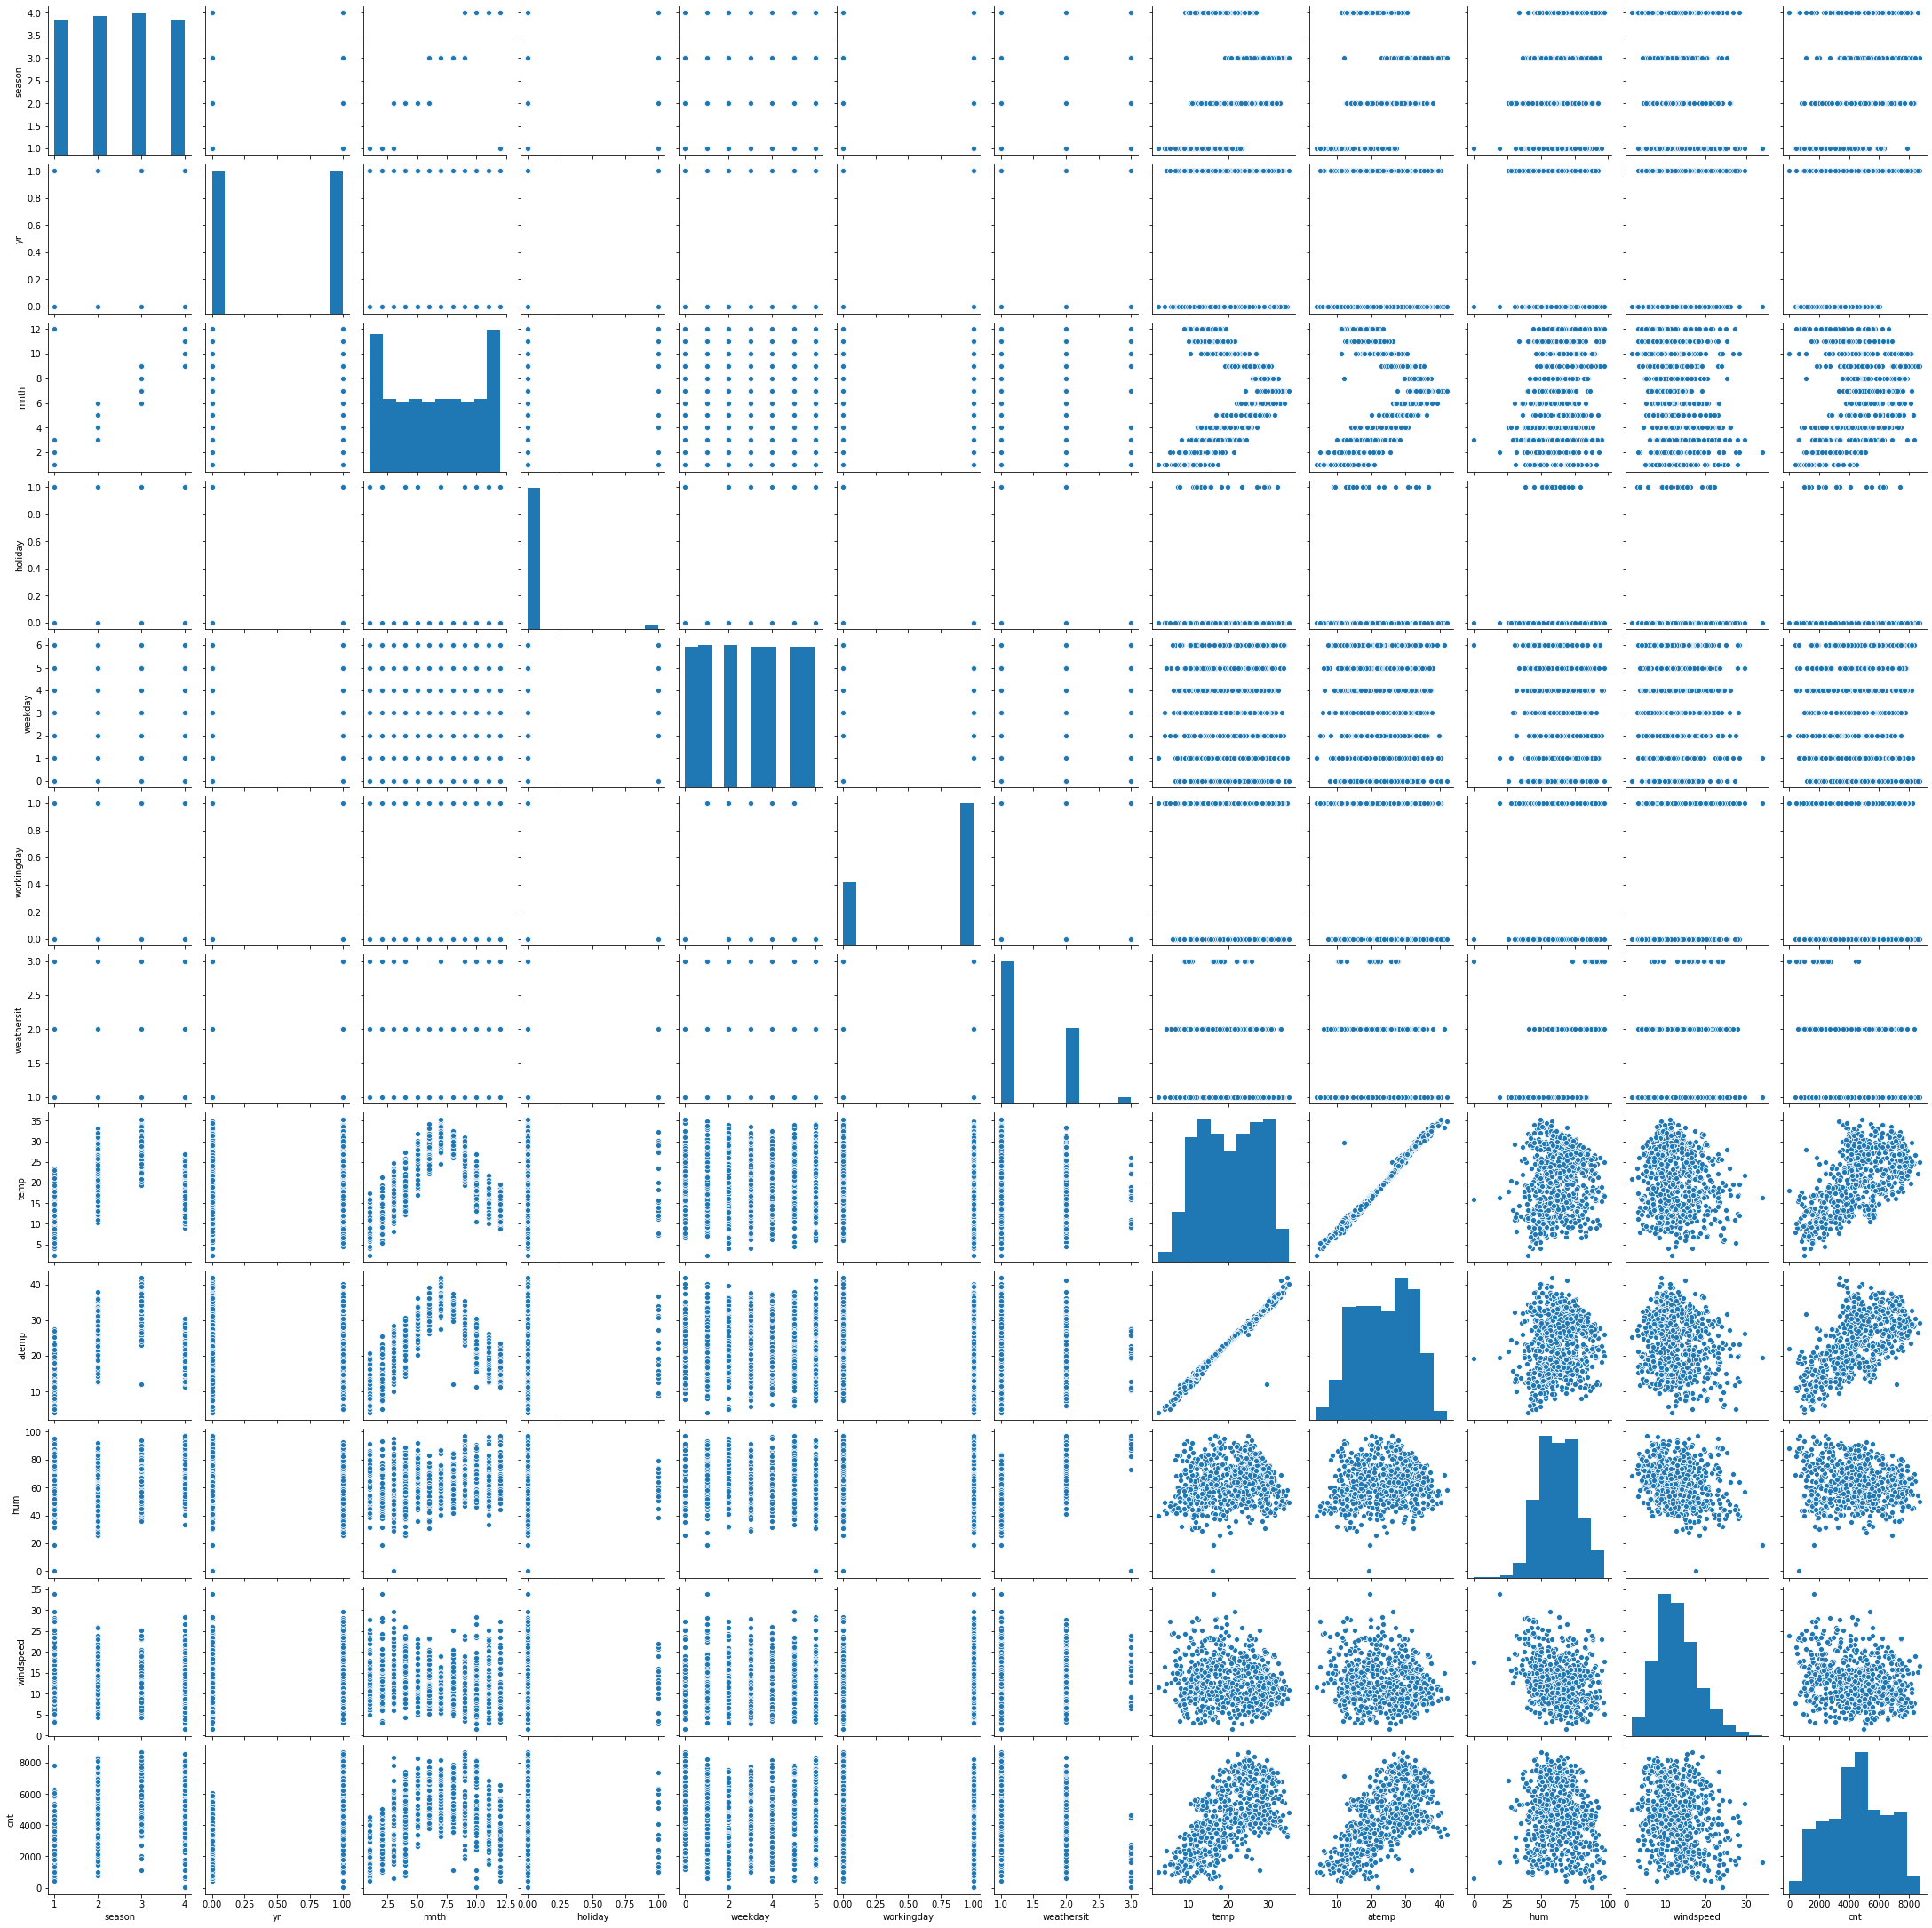

In [11]:
sns.pairplot(df)
plt.show()

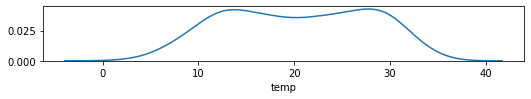

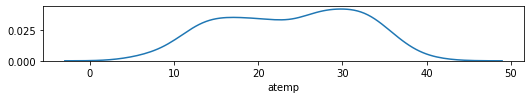

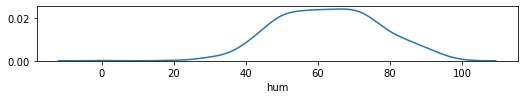

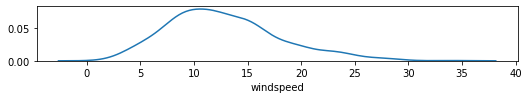

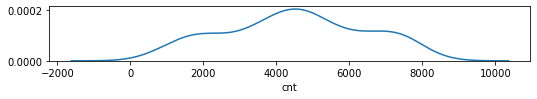

In [12]:
plt.figure(figsize=(50,1))

plt.subplot(1,5,1)
sns.distplot(df['temp'], hist = False)
plt.show()

plt.figure(figsize=(50,1))
plt.subplot(1,5,2)
sns.distplot(df['atemp'], hist = False)
plt.show()

plt.figure(figsize=(50,1))
plt.subplot(1,5,3)
sns.distplot(df['hum'], hist = False)
plt.show()

plt.figure(figsize=(50,1))
plt.subplot(1,5,4)
sns.distplot(df['windspeed'], hist = False)
plt.show()

plt.figure(figsize=(50,1))
plt.subplot(1,5,5)
sns.distplot(df['cnt'], hist = False)
plt.show()



#### Visualising Categorical Variables

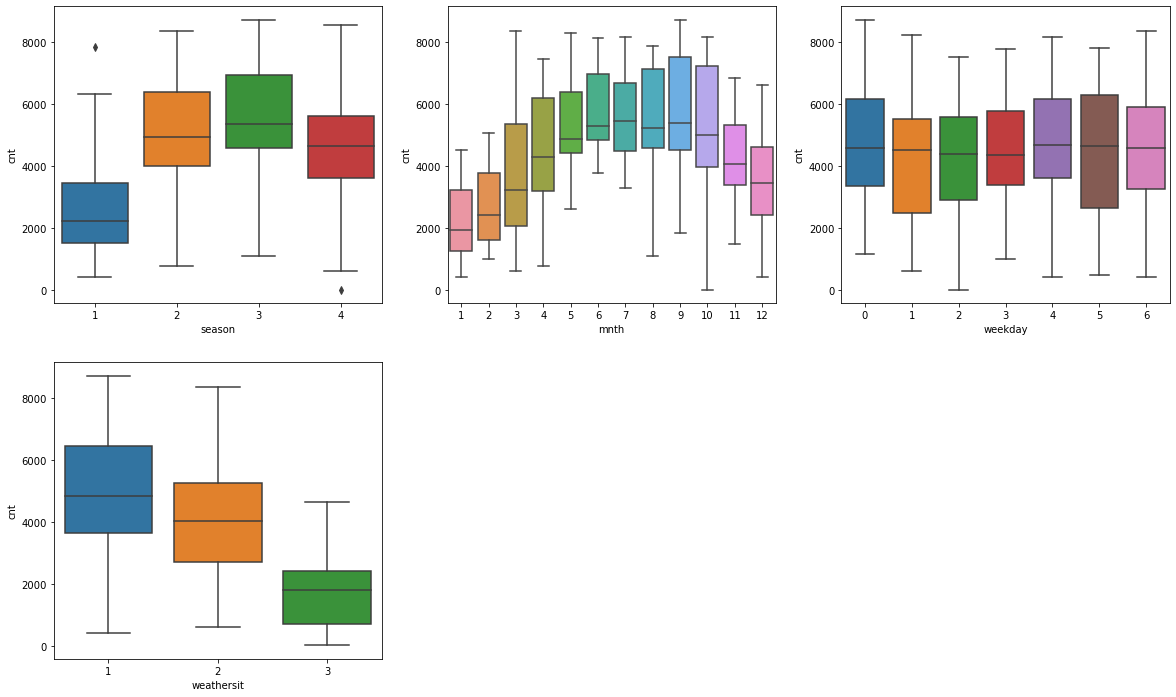

In [13]:
#Plot the boxplot of categorical variable to check values,outlier of the variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

- ### Subtask 1.2: Check the correlation between the variables

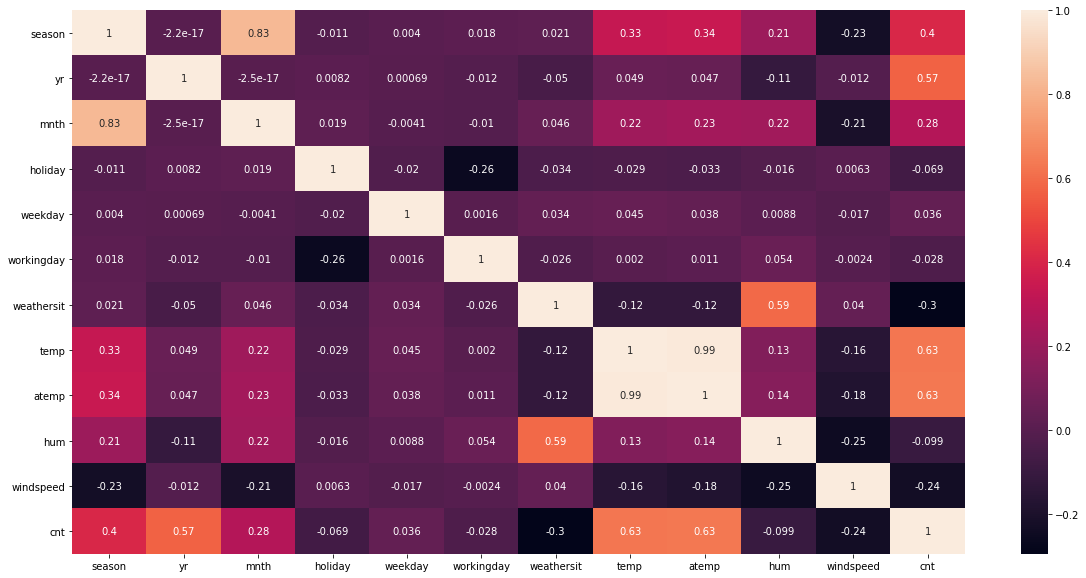

In [14]:
#Plot heatmap to check the correlation between the variables
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see that 'temp' and 'atemp' variable are highly correlated so we can drop one of them.

In [15]:
df.drop(['atemp'], axis = 1,inplace = True) 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.11,80.58,10.75,985
1,1,0,1,0,2,1,2,14.90,69.61,16.65,801
2,1,0,1,0,3,1,1,8.05,43.73,16.64,1349
3,1,0,1,0,4,1,1,8.20,59.04,10.74,1562
4,1,0,1,0,5,1,1,9.31,43.70,12.52,1600


##  Task 2: Data Preparation

Data preparation is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model..

- ### Subtask 1.1: Mapping all the categorical variable

season Variable

In [16]:
df[['season']]= df[['season']].apply(lambda x:x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))

In [17]:
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

mnth Variable

In [18]:
df[['mnth']]= df[['mnth']].apply(lambda x:x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))

In [19]:
df['mnth'].value_counts()

October      62
August       62
December     62
May          62
January      62
March        62
July         62
November     60
April        60
June         60
September    60
February     56
Name: mnth, dtype: int64

weekday Variable

In [20]:
df[['weekday']]= df[['weekday']].apply(lambda x:x.map({1:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'}))

In [21]:
df['weekday'].value_counts()

Monday       105
Tuesday      105
Friday       104
Wednesday    104
Saturday     104
Thrusday     104
Name: weekday, dtype: int64

weathersit Variable

In [22]:
df[['weathersit']]= df[['weathersit']].apply(lambda x:x.map({1:'Clear',2:'Cloudy',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'}))

In [23]:
df['weathersit'].value_counts()

Clear              463
Cloudy             246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

- ### Subtask 1.2: Create dummy variable for all the categorical variable

The categorical variables have some levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [24]:
# Create dummy variable for categorical variable
dummy1 = pd.get_dummies(df['season'],drop_first = True)
dummy2 = pd.get_dummies(df['mnth'],drop_first = True)
dummy3 = pd.get_dummies(df['weekday'],drop_first = True)
dummy4 = pd.get_dummies(df['weathersit'],drop_first = True)

df = pd.concat([df,dummy1,dummy2,dummy3,dummy4], axis = 1)

In [25]:
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [26]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,November,October,September,Monday,Saturday,Thrusday,Tuesday,Wednesday,Cloudy,Light_Snow_Rain
0,0,0,1,14.11,80.58,10.75,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.90,69.61,16.65,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


- ### Subtask 1.3: Divide Data into Train and Test

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 28)

In [29]:
df_test.shape

(219, 28)

- ### Subtask 1.4: Scaling the data

Scaling the data means to put the units of the coefficients on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling

Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [32]:
df_train[num_vars]

,temp,hum,windspeed,cnt
653,0.509875,0.575330,0.300930,0.864243
576,0.815254,0.725680,0.264678,0.827658
426,0.442419,0.640148,0.255374,0.465255
728,0.245214,0.498042,0.663138,0.204096
482,0.395624,0.504534,0.188643,0.482973
...,...,...,...,...
526,0.824369,0.605833,0.355791,0.764151
578,0.863871,0.679720,0.187360,0.832835
53,0.202674,0.435903,0.111646,0.218017
350,0.248253,0.577906,0.431825,0.312586


In [33]:
df_test[num_vars]

,temp,hum,windspeed,cnt
184,0.837006,0.534178,0.149434,0.704300
535,0.911212,0.470416,0.231321,0.725421
299,0.496111,0.777809,0.443396,0.278853
221,0.890149,0.236670,0.449811,0.545512
152,0.821776,0.070723,0.682264,0.569148
...,...,...,...,...
400,0.224887,0.603787,0.388302,0.315062
702,0.503889,0.667688,0.383774,0.775082
127,0.573558,0.525546,0.132075,0.489314
640,0.745301,0.751218,0.111698,0.896530


- ### Subtask 1.5: Dividing Data into X and Y

In [34]:
#For train set
x_train = df_train
y_train = df_train.pop('cnt')


In [35]:
#For test set
x_test = df_test
y_test = df_test.pop('cnt')


In [36]:
x_train.shape

(510, 27)

In [37]:
y_train.shape

(510,)

In [38]:
x_test.shape

(219, 27)

In [39]:
y_test.shape

(219,)

##  Task 3: Building a Linear Model

- ### Subtask 1.1: Recursie Elemination Function (RFE)

This will automatically choose n number of features which significantly important

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(x_train,y_train)        

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 13),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 9),
 ('Thrusday', False, 11),
 ('Tuesday', False, 3),
 ('Wednesday', False, 7),
 ('Cloudy', True, 1),
 ('Light_Snow_Rain', True, 1)]

In [42]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'December', 'January', 'July', 'November', 'September',
       'Cloudy', 'Light_Snow_Rain'],
      dtype='object')

In [43]:
x_train.columns[~rfe.support_]

Index(['workingday', 'August', 'February', 'June', 'March', 'May', 'October',
       'Monday', 'Saturday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

- ### Subtask 1.2: Building model using statsmodel

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [44]:
# Creating dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [45]:
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Summer,Winter,December,January,July,November,September,Cloudy,Light_Snow_Rain
653,1,0,0.509875,0.575330,0.300930,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815254,0.725680,0.264678,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442419,0.640148,0.255374,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245214,0.498042,0.663138,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395624,0.504534,0.188643,0,1,0,0,0,0,0,0,1,0


In [46]:
# Adding a constant variable to the 1st Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          3.38e-189
Time:                        17:42:13   Log-Likelihood:                 514.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3203      0.036     

- ### Subtask 1.3: Dropping the variable and updating the columns

`December` is insignificant in presence of other variables; can be dropped but lets check the VIF also

In [47]:
x_train_lm = x_train_lm.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the 1nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
13,Cloudy,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


As we can see that 'December' has high p-value and low VIF. So we will drop this first.

We will manually eliminate the insignificant variable by analysing p-value and VIF of the variable.

We could have:

    1) High p-value, high VIF(remove this first)
    
    2) High-Low
    
          High p-value, low VIF(remove this first in high-low format)
      
          Low p-value, high VIF(remove this after the above one)
      
    3) Low p-value, low VIF(keep this)

In [49]:
x_train_rfe = x_train_rfe.drop(["December"], axis = 1)

Rebuilding the model without `December`

In [50]:
# Adding a constant variable to the 2nd Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.27e-189
Time:                        17:42:15   Log-Likelihood:                 512.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3031      0.035     

In [51]:
x_train_lm = x_train_lm.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the 2nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.13
2,temp,16.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,3.78
6,Summer,2.79
12,Cloudy,2.29
0,yr,2.09
8,January,1.67
9,July,1.59


In [53]:
x_train_rfe = x_train_rfe.drop(["November"], axis = 1)

In [54]:
# Adding a constant variable to the 3rd Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          4.50e-190
Time:                        17:42:16   Log-Likelihood:                 511.28
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2957      0.035     

In [55]:
x_train_lm = x_train_lm.drop(['const'], axis=1)

In [56]:
# Calculate the VIFs for the 3rd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.05
2,temp,16.71
4,windspeed,4.66
5,Spring,4.34
7,Winter,3.38
6,Summer,2.78
11,Cloudy,2.28
0,yr,2.09
8,January,1.67
9,July,1.59


In [57]:
x_train_rfe = x_train_rfe.drop(["January"], axis = 1)

In [58]:
# Adding a constant variable to the 4th Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          1.72e-190
Time:                        17:42:16   Log-Likelihood:                 509.46
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [59]:
x_train_lm = x_train_lm.drop(['const'], axis=1)

In [60]:
# Calculate the VIFs for the 4th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.03
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.35
6,Summer,2.78
10,Cloudy,2.28
0,yr,2.08
8,July,1.58
9,September,1.38


In [61]:
x_train_rfe = x_train_rfe.drop(["hum"], axis = 1)

In [62]:
# Adding a constant variable to the 5th Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          2.43e-187
Time:                        17:42:17   Log-Likelihood:                 499.16
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [63]:
x_train_lm = x_train_lm.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the 5th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,yr,2.07
6,Winter,1.79
7,July,1.58
9,Cloudy,1.55
8,September,1.34
10,Light_Snow_Rain,1.08


In [65]:
x_train_rfe = x_train_rfe.drop(["July"], axis = 1)

In [66]:
# Adding a constant variable to the 6th Model
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train_rfe)

lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          7.45e-187
Time:                        17:42:18   Log-Likelihood:                 495.15
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1910      0.030     

In [67]:
#x_train_lm = x_train_lm.drop(['const'], axis=1)

In [68]:
# Calculate the VIFs for the 6th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.02
5,Spring,4.76
3,temp,3.31
7,Winter,3.11
6,Summer,2.24
8,September,1.17
4,windspeed,1.09
10,Light_Snow_Rain,1.05
9,Cloudy,1.04
1,yr,1.02


### Since, we get all the variable having 0.00 p-value and VIF is below than 5. So,this will be our best model.

- ### Subtask 1.4: Applying model on test set

Now we will use this model to run on Test set to check Adusted R-square. But first will apply RFE on test set

In [69]:
x_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'September', 'Cloudy', 'Light_Snow_Rain'],
      dtype='object')

In [70]:
x_test_rfe = x_test[x_train_rfe.columns]

In [71]:
# Adding a constant variable to the 6th Model for test set
import statsmodels.api as sm  
x_test_lm = sm.add_constant(x_test_rfe)

lm = sm.OLS(y_test,x_test_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     94.01
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.69e-71
Time:                        17:42:19   Log-Likelihood:                 190.54
No. Observations:                 219   AIC:                            -359.1
Df Residuals:                     208   BIC:                            -321.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2077      0.049     

In [72]:
x_test_lm = x_test_lm.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the 6th model for test set
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_test_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.74
2,temp,4.37
4,Spring,2.34
0,yr,1.98
5,Summer,1.97
6,Winter,1.57
8,Cloudy,1.55
7,September,1.24
9,Light_Snow_Rain,1.12
1,holiday,1.05


## Task 4: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

- ### Subtask 1.1: Residual Analysis


In [74]:
y_train_cnt = lm.predict(x_train_lm)

Text(0.5, 0, 'Errors')

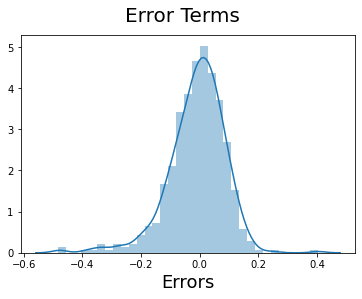

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

We can see that the resudual mean is somewhere around zero, so the model is quite descent. This zero resudual mean is one of the various assumption of Linear Regression.

In [76]:
# Making predictions using the sixth model
x_test_lm = x_test[x_train_rfe.columns]

In [77]:
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_lm)

In [78]:
# Making predictions
y_pred = lm.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

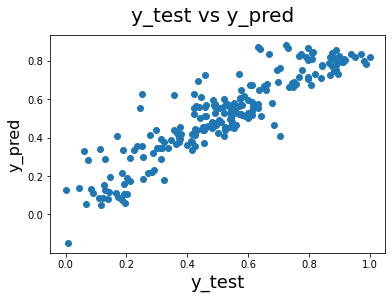

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label     

We can see that the equation of our best fitted line is:

$ cnt = 0.2639  \times  yr - 0.0753  \times  holiday + 0.4209 \times temp - 0.0292 \times windspeed - 0.1386 \times Spring + 0.0329 \times Summer + 0.0824 \times Winter + 0.0559 \times September - 0.0720 \times Cloudy - 0.2646 \times Light_Snow_Rain$
